
# Data Sci Eng Methods
## Assignment 1 – ML Data Cleaning and Feature Selection

Answer the following questions:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

## INTRODUCTION

Financial organizations often receive numerous credit applications, making it impractical to manually review each one. To streamline this process, a machine learning model has been developed using historical data of approved customers and their credit scores. This model helps automate the determination of credit scores for new applications, ensuring a quicker and more efficient decision-making process. By using predictive analytics and credit history information, it allows financial institutions to handle a large volume of applications with speed and accuracy, reducing the need for manual reviews and minimizing errors.

## DATA
Data contains a person’s credit-related information.

Data source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification/download

Data size: 31 MB (10 MB archived)

Data contains 100000 rows × 28 columns.

In [89]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

# Setting the maximum number of rows displayed when printing a DataFrame to 500
pd.set_option('display.max_rows', 500)

In [90]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Data/Credit Score Classification/train.csv')

<ipython-input-90-dd3ffa2c2ef3>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data/Credit Score Classification/train.csv')


In [93]:
# Checking the dimensions (number of rows and columns) of the DataFrame 'df'

df.shape

(100000, 28)

In [94]:
# Viewing data in the file
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [95]:
# Viewing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [92]:
# Identify unique rows in training set not present in test set
unique_train_not_test = train_set_unique - test_set_unique

# Identify unique rows in test set not present in training set
unique_test_not_train = test_set_unique - train_set_unique

print("Unique rows in training set not in test set:", len(unique_train_not_test))
print("Unique rows in test set not in training set:", len(unique_test_not_train))

Unique rows in training set not in test set: 80000
Unique rows in test set not in training set: 20000


In [96]:
# deleting unnecessary columns

df = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1)

In [97]:
# Iterate through DataFrame columns and print unique values for object-type columns

for col in df.columns:
  if df[col].dtype != "object":
    continue
  # Display unique values for the current object-type column
  print(f"Unique Values of {col}")
  print(df[col].unique())
  print("==================================================")

Unique Values of Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'

In [98]:
# Fixing data types for columns

df['Age'] = pd.to_numeric(df['Age'].replace('_', ''), errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'].replace('_', ''), errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'].replace('_', ''), errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'].replace('_', ''), errors='coerce')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'].replace('_', ''), errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].replace('_', ''), errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'].replace('_', ''), errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'].replace('_', ''), errors='coerce')


In [99]:
# Convert Credit History Age to number of months

def convert_credit_history_age_to_months(credit_history_age):
  if pd.isna(credit_history_age):
    return np.nan
  years, _, _, months, _ = credit_history_age.split(' ')
  return int(years) * 12 + int(months)

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_history_age_to_months)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       95061 non-null   float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             93020 non-null   float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               95215 non-null   float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    90254 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [101]:
# Getting Missing Values

df.isnull().sum()

Age                          4939
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

<Figure size 800x500 with 0 Axes>

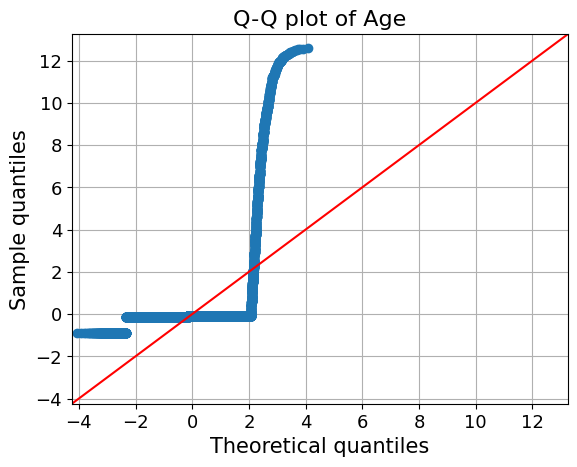

<Figure size 800x500 with 0 Axes>

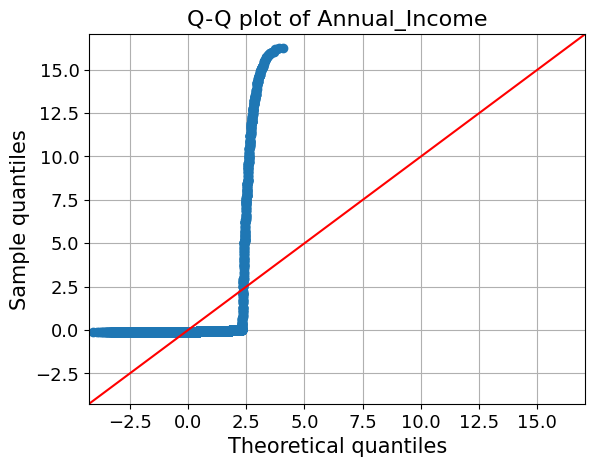

<Figure size 800x500 with 0 Axes>

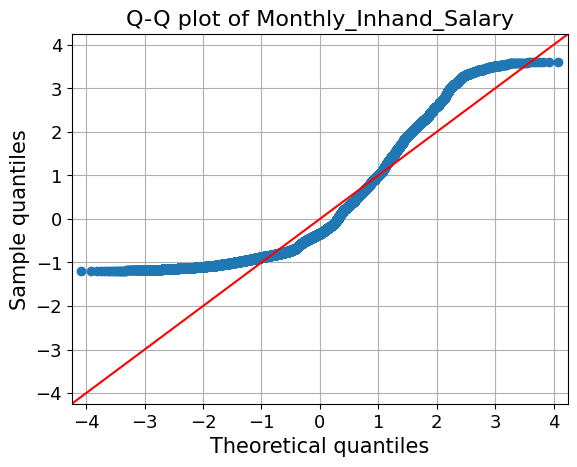

<Figure size 800x500 with 0 Axes>

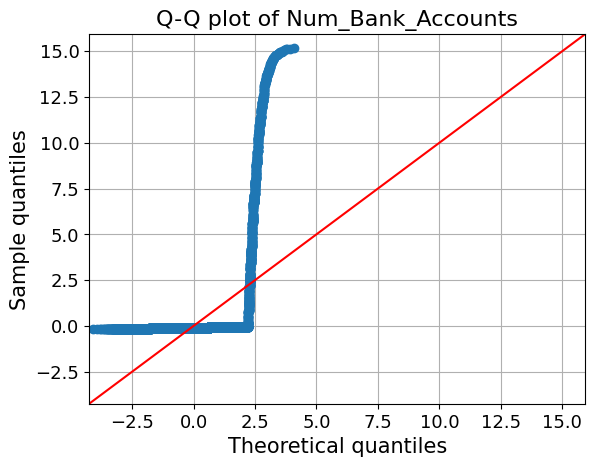

<Figure size 800x500 with 0 Axes>

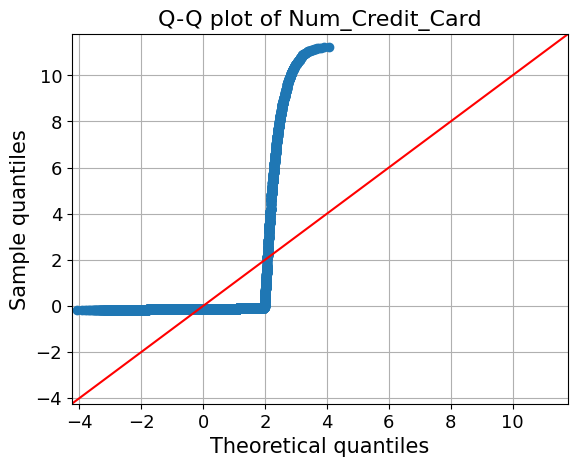

<Figure size 800x500 with 0 Axes>

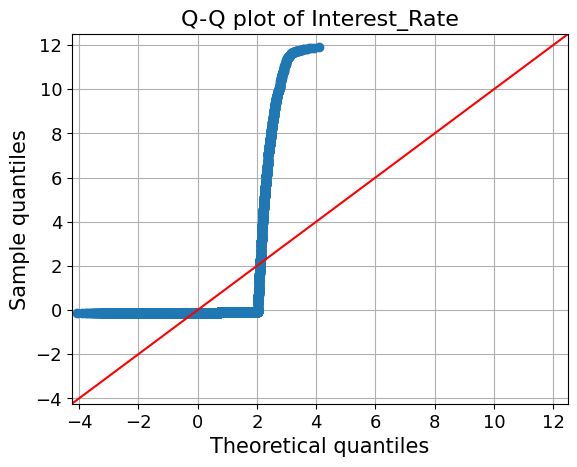

<Figure size 800x500 with 0 Axes>

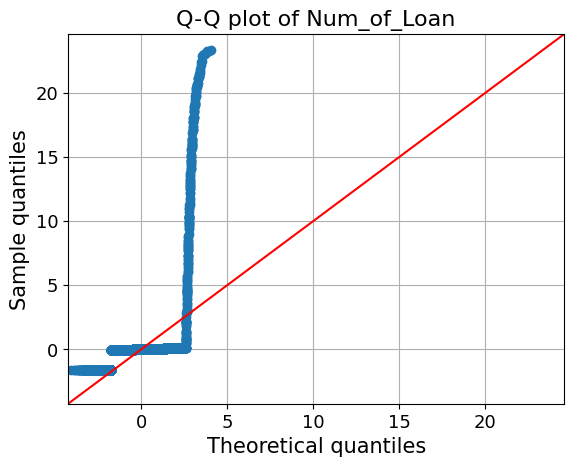

<Figure size 800x500 with 0 Axes>

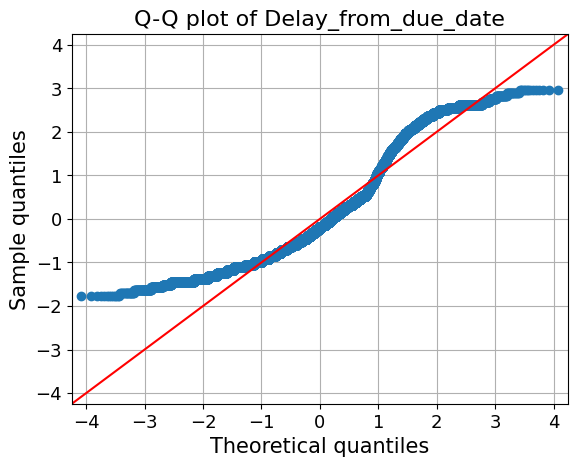

<Figure size 800x500 with 0 Axes>

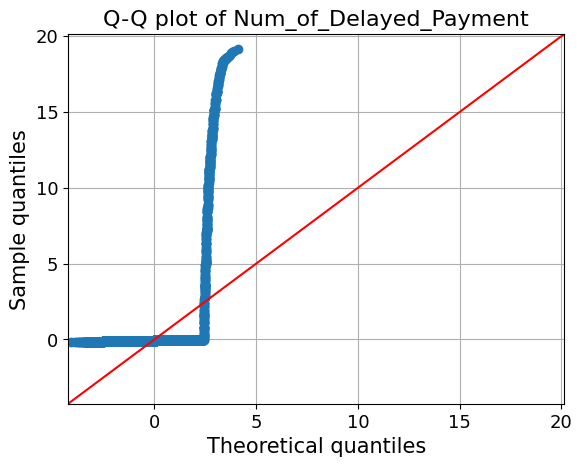

<Figure size 800x500 with 0 Axes>

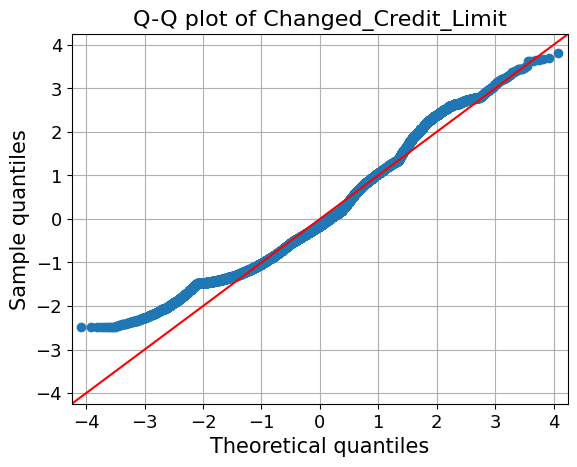

<Figure size 800x500 with 0 Axes>

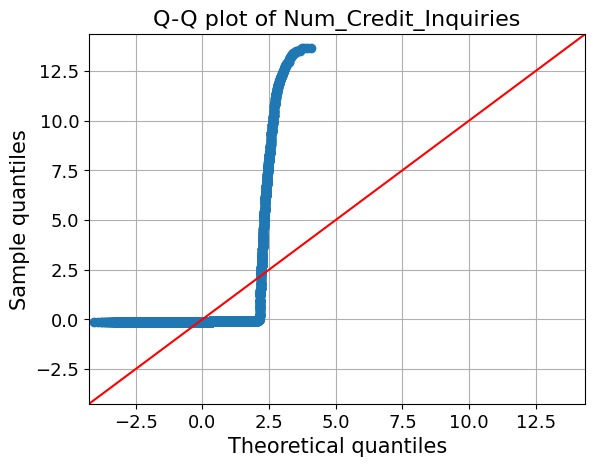

<Figure size 800x500 with 0 Axes>

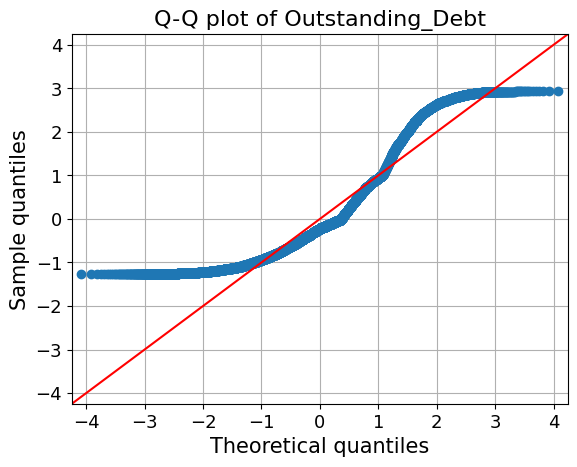

<Figure size 800x500 with 0 Axes>

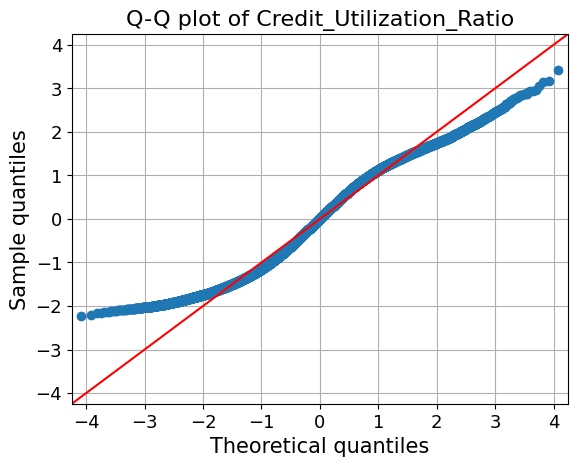

<Figure size 800x500 with 0 Axes>

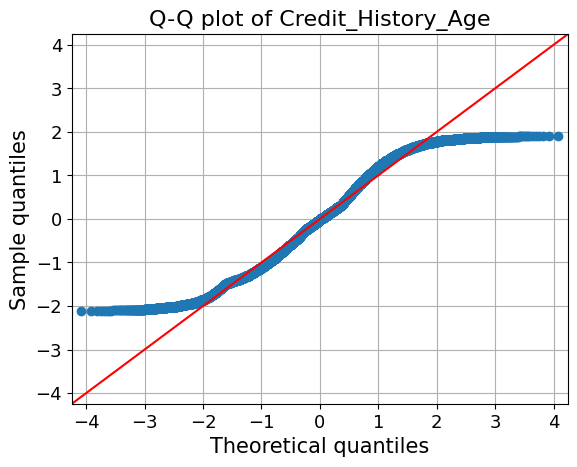

<Figure size 800x500 with 0 Axes>

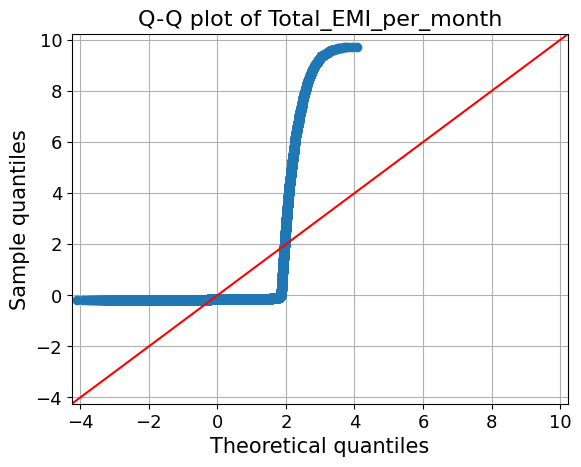

<Figure size 800x500 with 0 Axes>

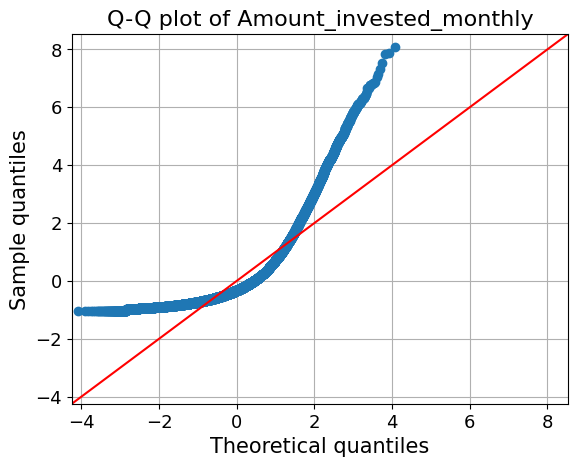

<Figure size 800x500 with 0 Axes>

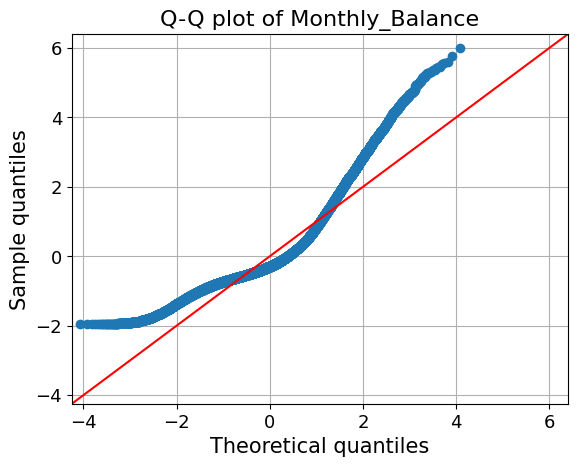

In [102]:
# Checking the distribution of independent variables using Q-Q plot

from statsmodels.graphics.gofplots import qqplot

data_norm = df.dropna()
for c in data_norm.columns:
    if (data_norm[c].dtype != 'int64') & (data_norm[c].dtype != 'float64'):
       continue
    plt.figure(figsize=(8, 5))
    data = data_norm[data_norm[c] != 0][c]
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()


<ipython-input-103-9f9a0a1d8d02>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=10)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

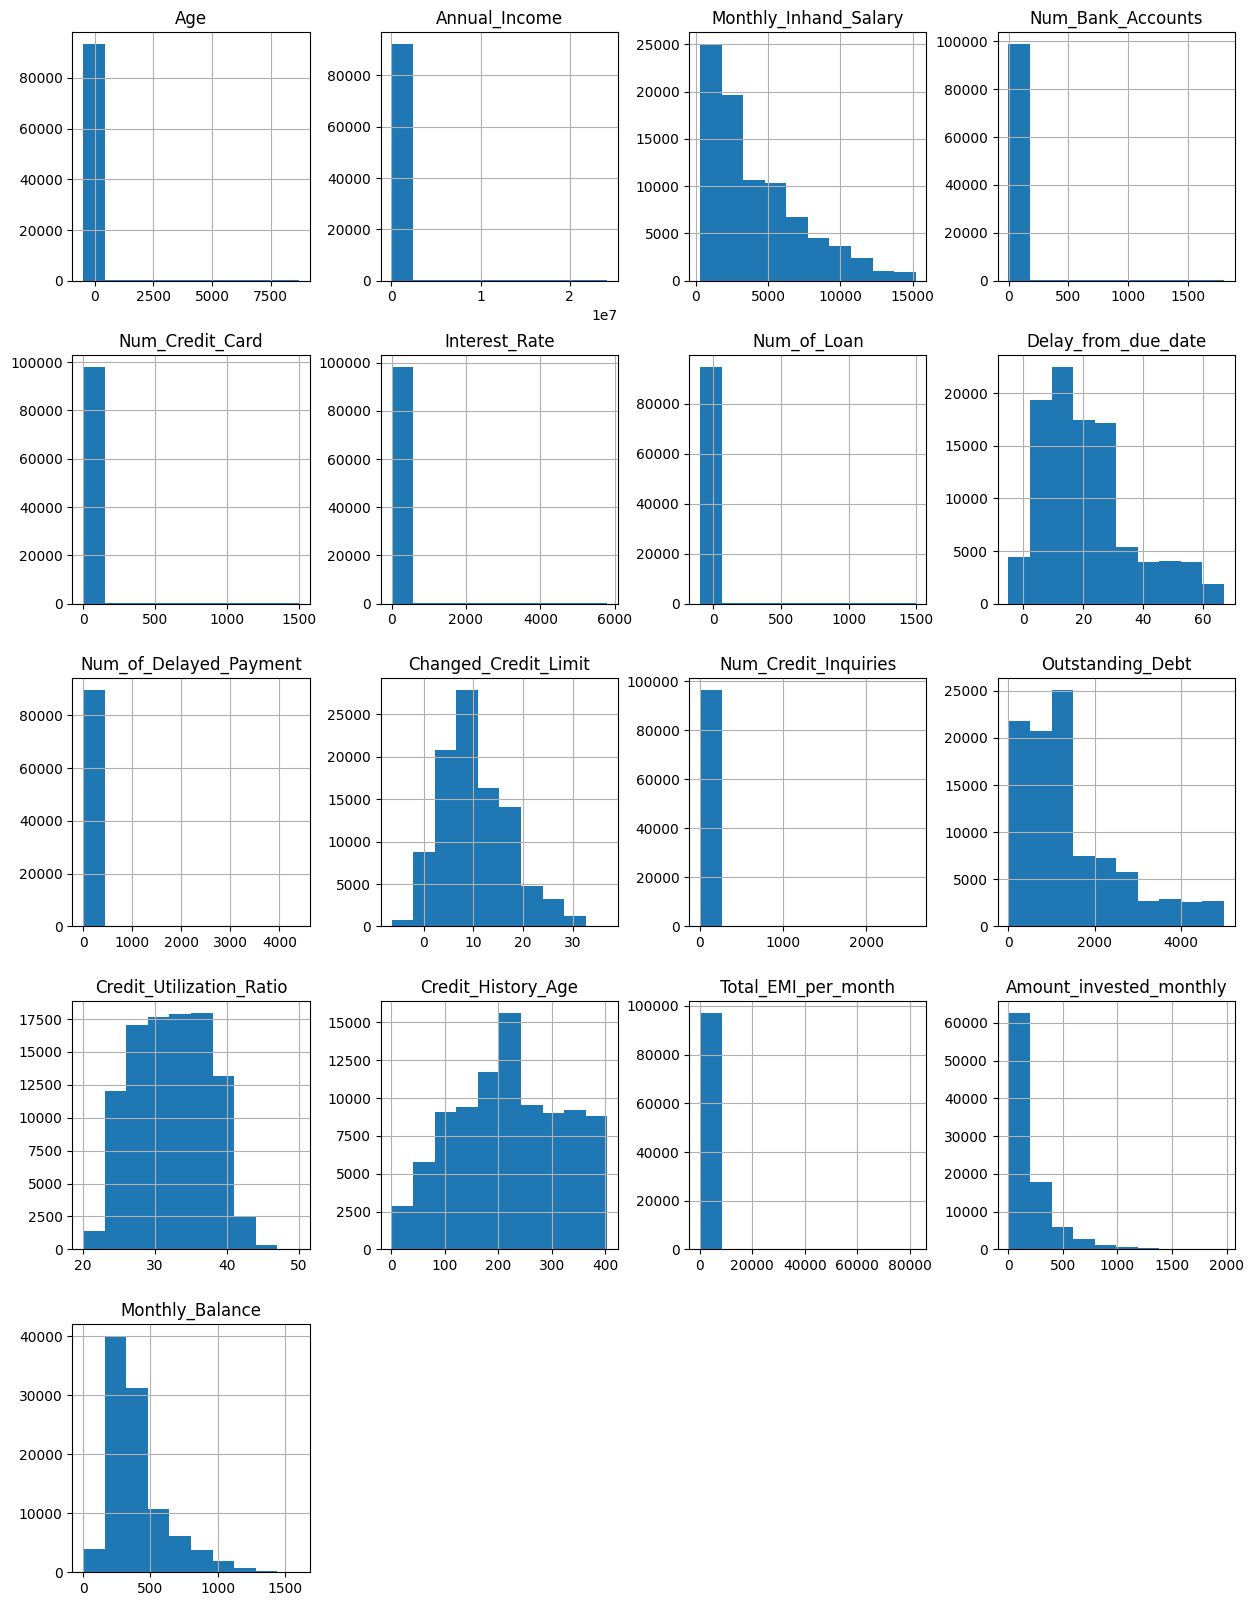

In [103]:
# Checking the distribution of independent variables using Histogram

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax, bins=10)

Looking at the histogram, it appears that most of the numeric variables such as Age, Annual Income, Num_Credit_Card, Num_of_Loan, Num of Delayed Payment, Num Credit Inquiries, Interest_Rate, Total EMI per month, Amount invested monthly, and Monthly Balance are heavily skewed to the right. This indicates that a majority of the data points are concentrated at the lower end of the scale for these variables.

However, variables like Monthly Inhand Salary, Credit Utilization Ratio, Changed Credit Limit, and Delay_from_due_date exhibit bimodal distributions, indicating the presence of two distinct groups within these variables.

The Credit History Age variable shows a multimodal distribution, suggesting a diverse range of credit history ages in the dataset.

In [104]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.000000,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000,90970.000000,100000.000000,91216.000000,98791.000000
mean,110.934505,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,221.195405,1403.118217,195.539456,402.551258
std,689.407864,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,99.741364,8306.041270,199.564527,213.925499
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,144.000000,30.306660,72.236692,270.106630
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,219.000000,69.249473,128.954538,336.731225
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,302.000000,161.224249,236.815814,470.262938
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,404.000000,82331.000000,1977.326102,1602.040519


In [105]:
# Finding Outlier Ranges

for x in df.columns:
    if (df[x].dtype != 'int64') & (df[x].dtype != 'float64'):
       continue

    q75,q25 = np.percentile(df.dropna().loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    print(x, min, max)

Age -3.0 69.0
Annual_Income -57860.065 146549.015
Monthly_Inhand_Salary -4633.230833333332 11913.162499999999
Num_Bank_Accounts -2.0 14.0
Num_Credit_Card -0.5 11.5
Interest_Rate -13.0 43.0
Num_of_Loan -4.0 12.0
Delay_from_due_date -18.5 57.5
Num_of_Delayed_Payment -6.0 34.0
Changed_Credit_Limit -9.16375 30.286250000000003
Num_Credit_Inquiries -6.0 18.0
Outstanding_Debt -1676.4800000000005 4424.800000000001
Credit_Utilization_Ratio 15.419391701091492 48.981425311092984
Credit_History_Age -103.0 529.0
Total_EMI_per_month -149.72397615896705 359.80300422590676
Amount_invested_monthly -161.2628539715279 453.89152533733596
Monthly_Balance -4.670655093433254 713.882784537763


In [106]:
df_with_outliers = df.copy(deep=True)

In [107]:
# Removing Outliers

df.loc[(df['Age'] < 0) | (df['Age'] > 70), 'Age'] = np.nan
df.loc[(df['Annual_Income'] < 0) | (df['Annual_Income'] > 150000), 'Annual_Income'] = np.nan
# df.loc[(df['Monthly_Inhand_Salary'] < 0) | (df['Monthly_Inhand_Salary'] > 12000), 'Monthly_Inhand_Salary'] = np.nan
df.loc[(df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > 14), 'Num_Bank_Accounts'] = np.nan
df.loc[(df['Num_Credit_Card'] < 0) | (df['Num_Credit_Card'] > 12), 'Num_Credit_Card'] = np.nan
df.loc[(df['Interest_Rate'] < 0) | (df['Interest_Rate'] > 43), 'Interest_Rate'] = np.nan
df.loc[(df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > 12), 'Num_of_Loan'] = np.nan
df.loc[(df['Delay_from_due_date'] < 0) | (df['Delay_from_due_date'] > 60), 'Delay_from_due_date'] = np.nan
df.loc[(df['Num_of_Delayed_Payment'] < 0) | (df['Num_of_Delayed_Payment'] > 35), 'Num_of_Delayed_Payment'] = np.nan
df.loc[(df['Changed_Credit_Limit'] < -10) | (df['Changed_Credit_Limit'] > 30), 'Changed_Credit_Limit'] = np.nan
df.loc[(df['Num_Credit_Inquiries'] < 0) | (df['Num_Credit_Inquiries'] > 18), 'Num_Credit_Inquiries'] = np.nan
df.loc[(df['Credit_Utilization_Ratio'] < 0) | (df['Credit_Utilization_Ratio'] > 50), 'Credit_Utilization_Ratio'] = np.nan
df.loc[(df['Credit_History_Age'] < 0) | (df['Credit_History_Age'] > 550), 'Credit_History_Age'] = np.nan
df.loc[(df['Total_EMI_per_month'] < 0) | (df['Total_EMI_per_month'] > 360), 'Total_EMI_per_month'] = np.nan
df.loc[(df['Amount_invested_monthly'] < 0) | (df['Amount_invested_monthly'] > 450), 'Amount_invested_monthly'] = np.nan
df.loc[(df['Monthly_Balance'] < 0) | (df['Monthly_Balance'] > 720), 'Monthly_Balance'] = np.nan

<ipython-input-108-479fefee16b0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=10)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

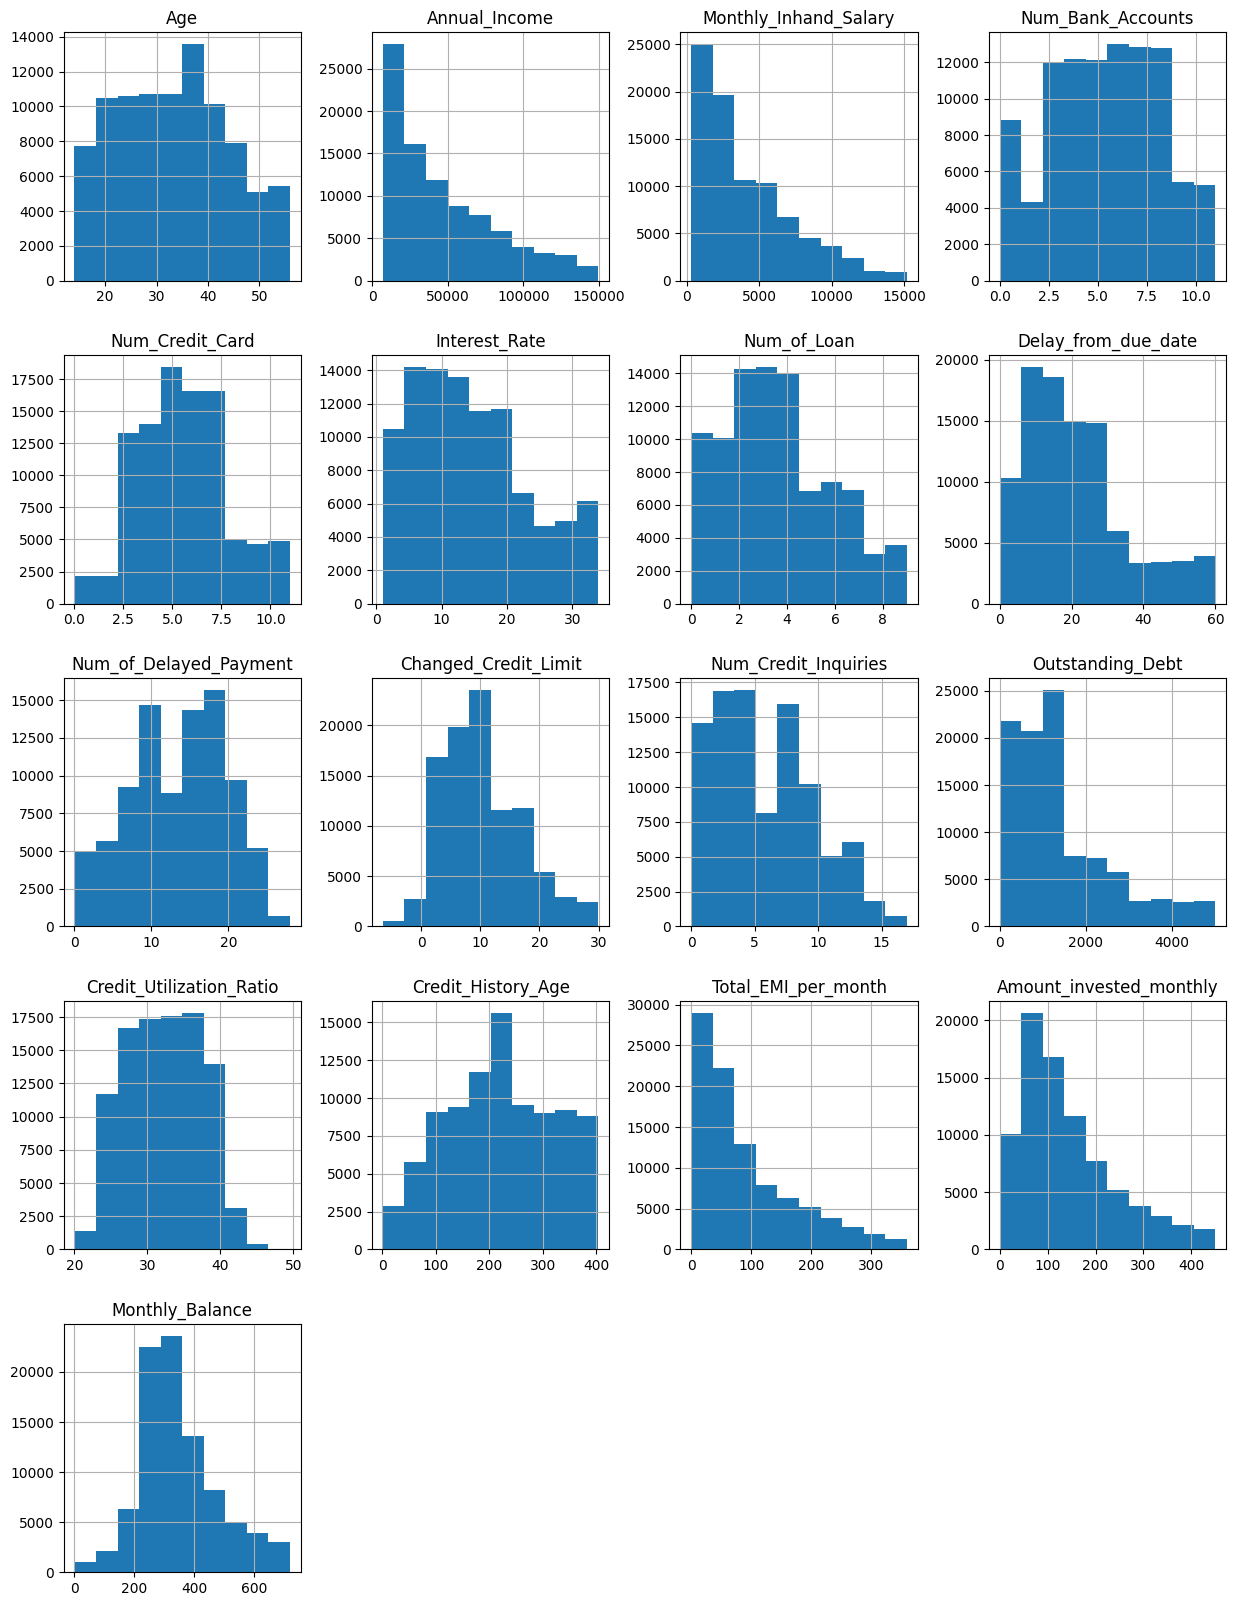

In [108]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax, bins=10)

In [ ]:
# Checking the distribution of independent variables using Q-Q plot
from statsmodels.graphics.gofplots import qqplot

data_norm = df.dropna()
for c in data_norm.columns:
    if (data_norm[c].dtype != 'int64') & (data_norm[c].dtype != 'float64'):
       continue
    plt.figure(figsize=(8, 5))
    data = data_norm[data_norm[c] != 0][c]
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()


After removing the outliers,the histograms depict that the variables such as Age, Annual Income, Num_Credit_Card, Num_of_Loan, Num of Delayed Payment, Num Credit Inquiries, Interest_Rate, Total EMI per month, Amount invested monthly, and Monthly Balance are heavily skewed to the right. This suggests that a majority of the data points are concentrated at the lower end of the scale for these variables.

However, some variables like Monthly Inhand Salary, Credit Utilization Ratio, Changed Credit Limit, and Delay_from_due_date exhibit bimodal distributions. This indicates the presence of two distinct groups within these variables. The Credit History Age variable shows a multimodal distribution, suggesting a diverse range of credit history ages in the dataset.

The “Num Bank Accounts” variable shows a left-skewed distribution, indicating that many people have more bank accounts. The “Interest Rate” variable appears to be somewhat uniformly distributed but with a significant drop after an interest rate of 2.5%. The “Monthly Balance” variable shows a normal distribution centered around a specific value

In [110]:
df.info()
# missing values increased due to removing outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       92365 non-null   float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             90235 non-null   float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         98664 non-null   float64
 5   Num_Credit_Card           97729 non-null   float64
 6   Interest_Rate             97966 non-null   float64
 7   Num_of_Loan               90892 non-null   float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       98107 non-null   float64
 10  Num_of_Delayed_Payment    88915 non-null   float64
 11  Changed_Credit_Limit      97654 non-null   float64
 12  Num_Credit_Inquiries      96385 non-null   float64
 13  Credit_Mix                100000 non-null  ob

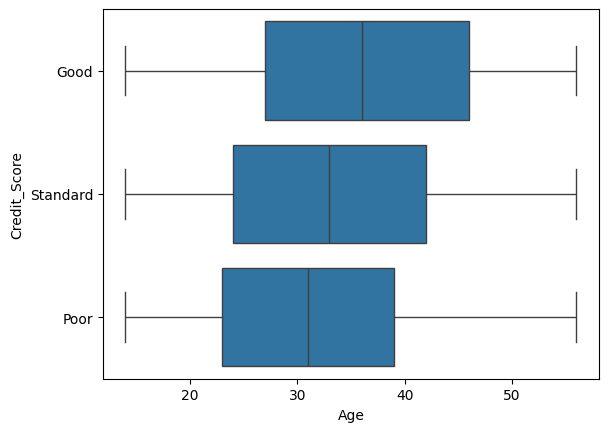

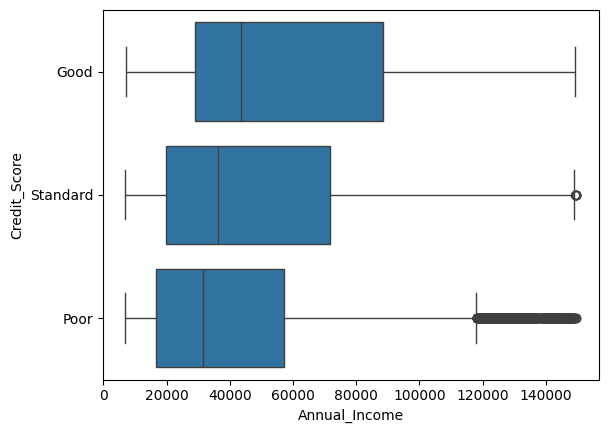

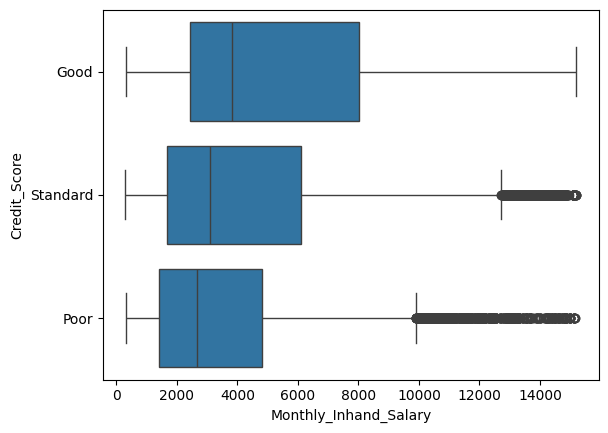

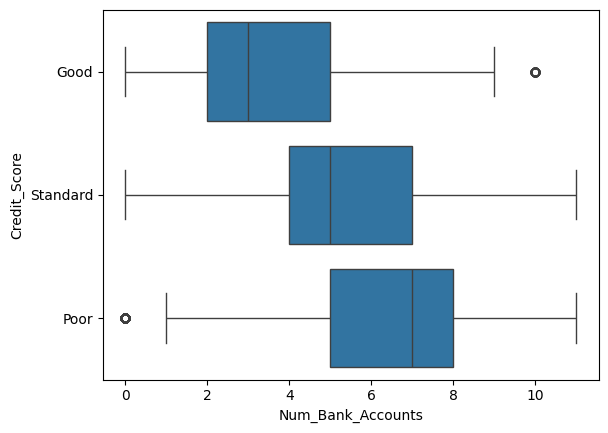

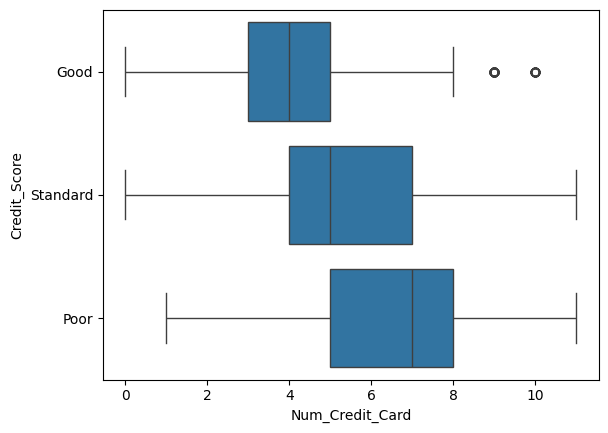

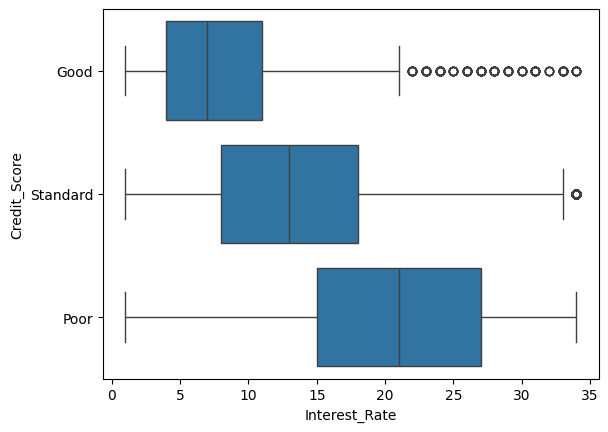

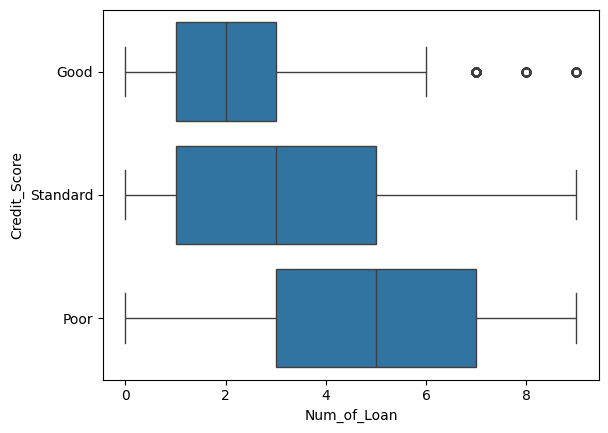

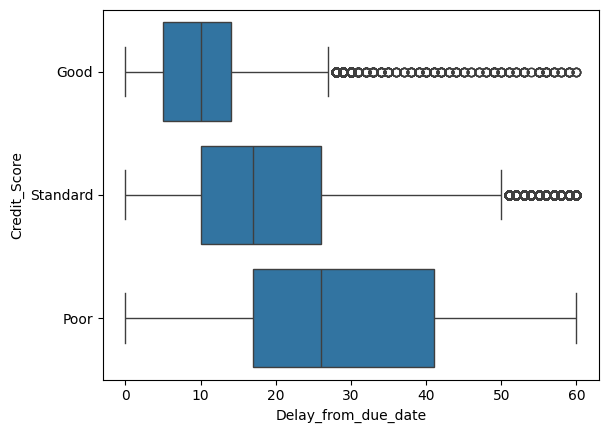

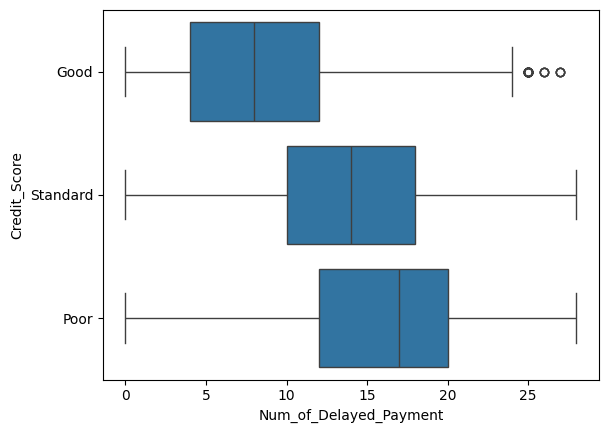

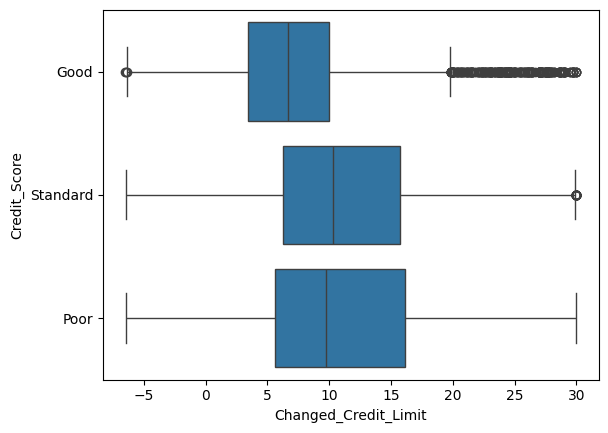

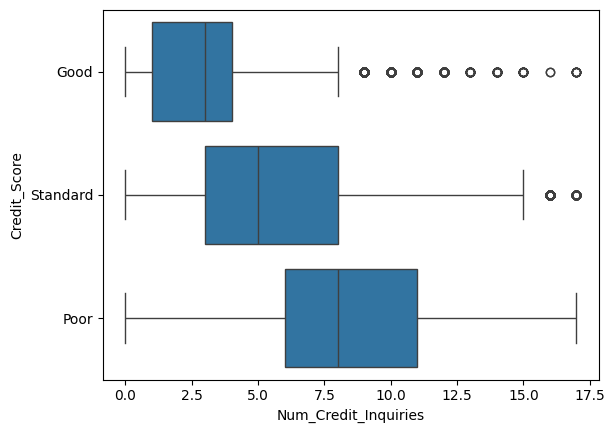

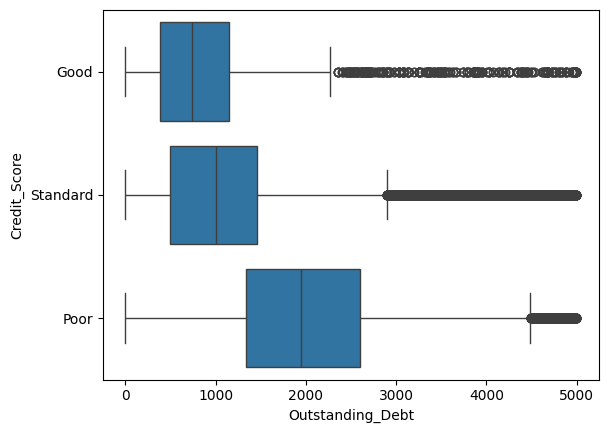

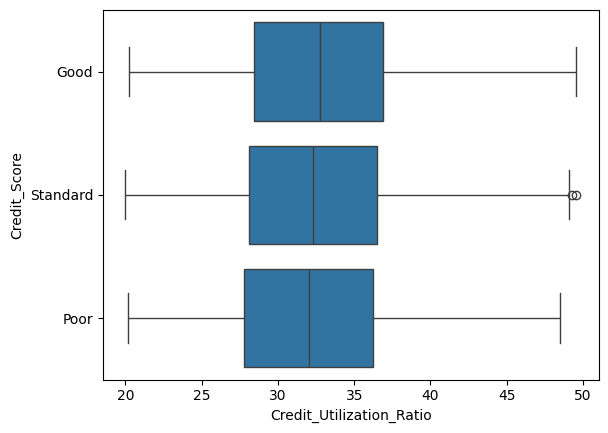

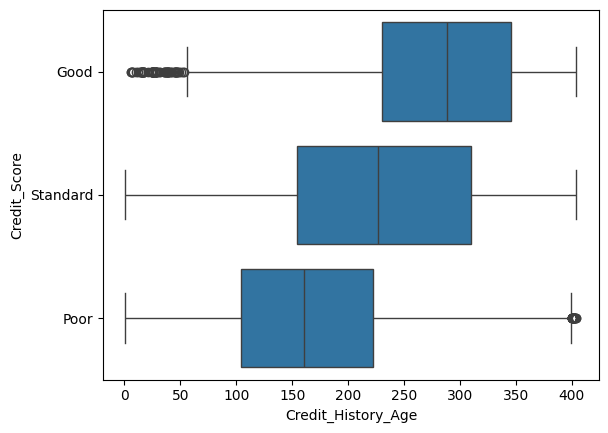

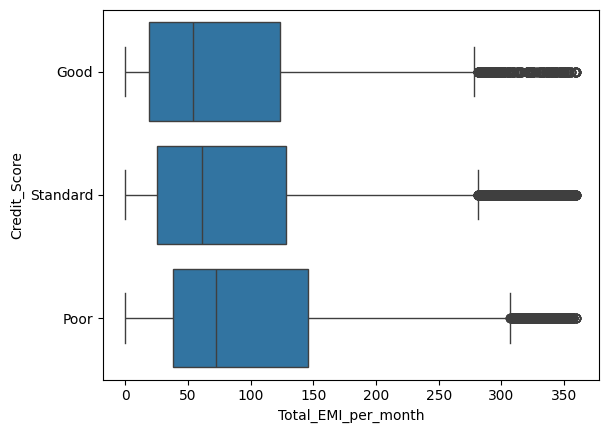

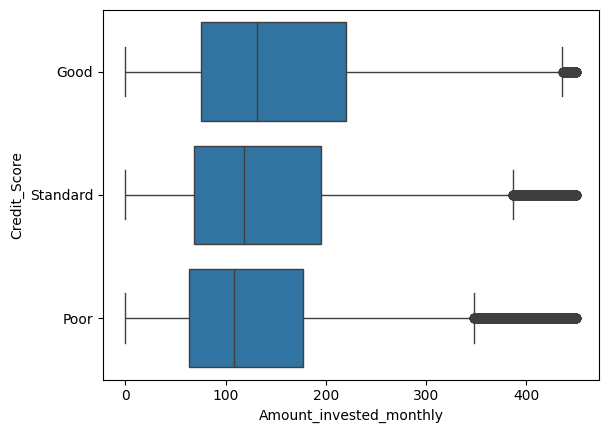

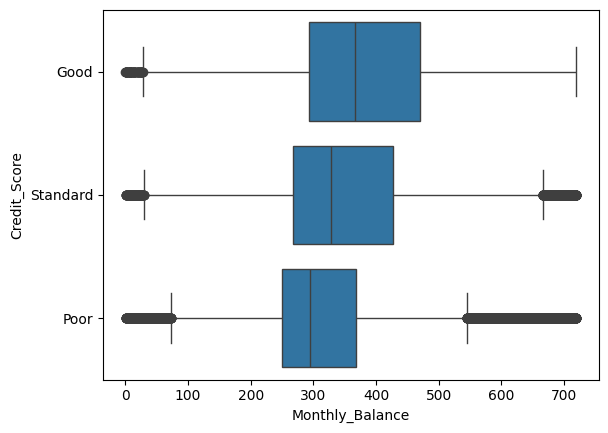

In [111]:
# Finding good predictors of target variable using box plot (method 1)

for col in df.columns:
  if (df[col].dtype != 'int64') & (df[col].dtype != 'float64'):
    continue
  sns.boxplot(df,y="Credit_Score",x=col)
  plt.show()

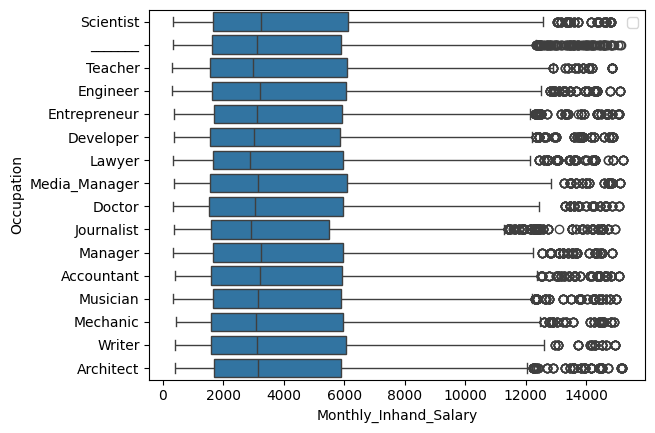

In [112]:
sns.boxplot(df,y="Occupation",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

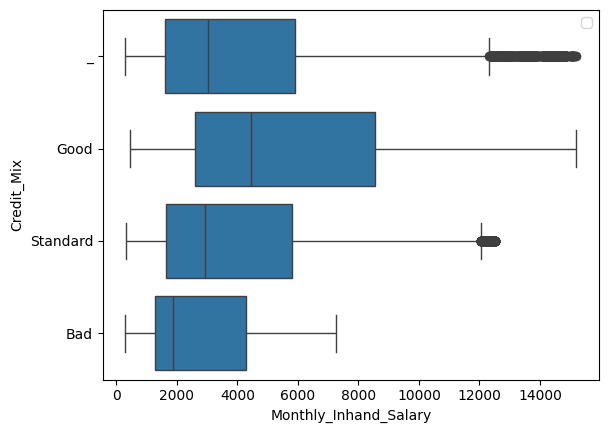

In [113]:
sns.boxplot(df,y="Credit_Mix",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

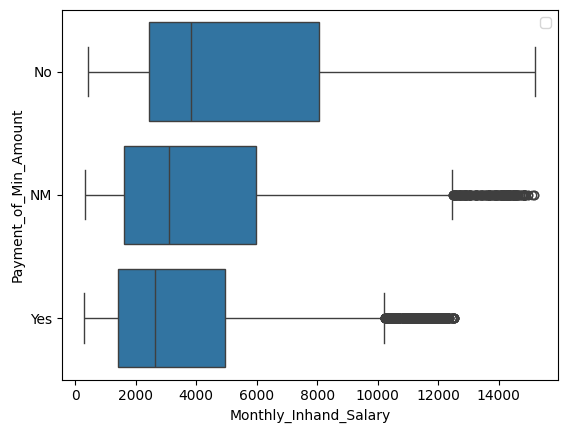

In [114]:
sns.boxplot(df,y="Payment_of_Min_Amount",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

In [115]:
df = df.drop(['Occupation', 'Type_of_Loan'], axis=1)

In [116]:
# Encoding Categorical Columns to find correlation

def encode_labels(df):
  df['Credit_Mix'] = df['Credit_Mix'].replace({
      "Good":3,
      "Standard":2,
      "Bad":1,
      "_": np.nan
  })
  df['Payment_Behaviour'] = df['Payment_Behaviour'].replace({
      'Low_spent_Small_value_payments': 1,
      'Low_spent_Medium_value_payments': 2,
      'Low_spent_Large_value_payments': 3,
      'High_spent_Small_value_payments': 4,
      'High_spent_Medium_value_payments': 5,
      'High_spent_Large_value_payments': 6,
      '!@9#%8': np.nan
  })
  df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({
      "No":1,
      "NM":2,
      "Yes":3,
  })
  df['Credit_Score'] = df['Credit_Score'].replace({
      "Poor":0,
      "Standard":1,
      "Good":2
  })

encode_labels(df)
encode_labels(df_with_outliers)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       92365 non-null   float64
 1   Annual_Income             90235 non-null   float64
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         98664 non-null   float64
 4   Num_Credit_Card           97729 non-null   float64
 5   Interest_Rate             97966 non-null   float64
 6   Num_of_Loan               90892 non-null   float64
 7   Delay_from_due_date       98107 non-null   float64
 8   Num_of_Delayed_Payment    88915 non-null   float64
 9   Changed_Credit_Limit      97654 non-null   float64
 10  Num_Credit_Inquiries      96385 non-null   float64
 11  Credit_Mix                79805 non-null   float64
 12  Outstanding_Debt          98991 non-null   float64
 13  Credit_Utilization_Ratio  99999 non-null   fl

In [118]:
# Finding good predictors of target variable using pearsons (method 2)

corrmatrix = df.corr(method='pearson').apply(abs)
corrmatrix.nlargest(10, "Credit_Score")["Credit_Score"]

Credit_Score             1.000000
Credit_Mix               0.499396
Interest_Rate            0.484784
Num_Credit_Inquiries     0.434970
Delay_from_due_date      0.423957
Payment_of_Min_Amount    0.414525
Num_Credit_Card          0.403931
Credit_History_Age       0.389288
Num_Bank_Accounts        0.388859
Outstanding_Debt         0.386534
Name: Credit_Score, dtype: float64

In [119]:
# Finding good predictors of target variable using spearman (method 3)

corrmatrix = df.corr(method='spearman').apply(abs)
corrmatrix.nlargest(10, "Credit_Score")["Credit_Score"]

Credit_Score             1.000000
Credit_Mix               0.491064
Interest_Rate            0.480871
Num_Credit_Inquiries     0.437876
Outstanding_Debt         0.434044
Delay_from_due_date      0.428240
Payment_of_Min_Amount    0.404039
Credit_History_Age       0.397910
Num_Bank_Accounts        0.387410
Num_Credit_Card          0.385340
Name: Credit_Score, dtype: float64

Q. Which independent variables are useful to predict a target (dependent variable)?
 A.
1. Credit_Mix
2. Interest_Rate
3. Num_Credit_Inquiries
4. Outstanding_Debt
5. Delay_from_due_date
6. Payment_of_Min_Amount
7. Credit_History_Age
8. Num_Bank_Accounts
9. Num_Credit_Card


In [120]:
# checking for collinearity

df.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.088901,0.090275,-0.191032,-0.147531,-0.217388,-0.214156,-0.173160,-0.181473,-0.156872,...,0.242116,-0.203311,0.024774,0.235754,-0.251234,-0.074629,0.040523,0.034376,0.103019,0.161294
Annual_Income,0.088901,1.000000,0.997857,-0.249402,-0.202716,-0.275082,-0.241201,-0.219223,-0.240075,-0.148447,...,0.297661,-0.257517,0.151198,0.256258,-0.247715,0.465982,0.501462,0.313667,0.474317,0.197467
Monthly_Inhand_Salary,0.090275,0.997857,1.000000,-0.281711,-0.218397,-0.301492,-0.254484,-0.246451,-0.282556,-0.173448,...,0.341199,-0.269248,0.173098,0.273883,-0.288119,0.451711,0.507812,0.305665,0.462326,0.209318
Num_Bank_Accounts,-0.191032,-0.249402,-0.281711,1.000000,0.443212,0.584276,0.473118,0.553968,0.597821,0.328083,...,-0.723514,0.507334,-0.071576,-0.484680,0.546567,0.103648,-0.137110,-0.094054,-0.236219,-0.388859
Num_Credit_Card,-0.147531,-0.202716,-0.218397,0.443212,1.000000,0.497436,0.419015,0.472182,0.421306,0.249296,...,-0.545045,0.490895,-0.055427,-0.417373,0.388879,0.110441,-0.105772,-0.070371,-0.204662,-0.403931
Interest_Rate,-0.217388,-0.275082,-0.301492,0.584276,0.497436,1.000000,0.559977,0.576576,0.567969,0.362997,...,-0.753591,0.629449,-0.076252,-0.577708,0.592954,0.141623,-0.153234,-0.103471,-0.270382,-0.484784
Num_of_Loan,-0.214156,-0.241201,-0.254484,0.473118,0.419015,0.559977,1.000000,0.493672,0.474873,0.363754,...,-0.638805,0.639291,-0.101266,-0.607117,0.485617,0.474309,-0.131481,-0.088425,-0.395257,-0.357050
Delay_from_due_date,-0.173160,-0.219223,-0.246451,0.553968,0.472182,0.576576,0.493672,1.000000,0.531389,0.293112,...,-0.682049,0.563699,-0.063965,-0.484696,0.469136,0.140983,-0.122282,-0.083308,-0.232558,-0.423957
Num_of_Delayed_Payment,-0.181473,-0.240075,-0.282556,0.597821,0.421306,0.567969,0.474873,0.531389,1.000000,0.318263,...,-0.754012,0.504091,-0.073281,-0.480661,0.551054,0.117036,-0.132093,-0.093802,-0.233743,-0.369273
Changed_Credit_Limit,-0.156872,-0.148447,-0.173448,0.328083,0.249296,0.362997,0.363754,0.293112,0.318263,1.000000,...,-0.426393,0.450749,-0.047841,-0.421041,0.475371,0.107697,-0.088354,-0.051312,-0.163286,-0.169108


In [121]:
# Computing the absolute correlation coefficients for all pairs of variables in the DataFrame and eliminating duplicate pairs and presents the top 50 correlation values

pairs_to_drop = set()
cols = df.columns
for i in range(0, df.shape[1]):
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))

au_corr = df.corr().abs().unstack()
au_corr = au_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)
au_corr[0:50]

Annual_Income           Monthly_Inhand_Salary      0.997857
Num_of_Delayed_Payment  Credit_Mix                 0.754012
Interest_Rate           Credit_Mix                 0.753591
Num_Bank_Accounts       Credit_Mix                 0.723514
Credit_Mix              Payment_of_Min_Amount      0.720706
                        Outstanding_Debt           0.689550
Delay_from_due_date     Credit_Mix                 0.682049
Num_Credit_Inquiries    Credit_Mix                 0.663314
Credit_Mix              Credit_History_Age         0.642177
Num_of_Loan             Outstanding_Debt           0.639291
                        Credit_Mix                 0.638805
Interest_Rate           Num_Credit_Inquiries       0.632645
Outstanding_Debt        Credit_History_Age         0.629567
Interest_Rate           Outstanding_Debt           0.629449
Num_Credit_Inquiries    Credit_History_Age         0.610521
Num_of_Loan             Credit_History_Age         0.607117
Num_Bank_Accounts       Num_of_Delayed_P

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       92365 non-null   float64
 1   Annual_Income             90235 non-null   float64
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         98664 non-null   float64
 4   Num_Credit_Card           97729 non-null   float64
 5   Interest_Rate             97966 non-null   float64
 6   Num_of_Loan               90892 non-null   float64
 7   Delay_from_due_date       98107 non-null   float64
 8   Num_of_Delayed_Payment    88915 non-null   float64
 9   Changed_Credit_Limit      97654 non-null   float64
 10  Num_Credit_Inquiries      96385 non-null   float64
 11  Credit_Mix                79805 non-null   float64
 12  Outstanding_Debt          98991 non-null   float64
 13  Credit_Utilization_Ratio  99999 non-null   fl

In [123]:
df_with_na = df.copy(deep=True)

In [124]:
# Fills missing values in the DataFrame df with the mean of each respective column.
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [125]:
# Using a RandomForestClassifier to evaluate the predictive performance on a test set, printing the accuracy score and confusion matrix.

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

def evaluate(df):
  X_train, X_test, y_train, y_test = train_test_split(
      df.drop('Credit_Score', axis=1),
      df['Credit_Score'],
      test_size=0.2,
      random_state=42
  )

  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

In [126]:
# Evaluating predictive model with and without outliers
print("Without Outliers")
evaluate(df)


Without Outliers
0.7868
[[4632 1130  112]
 [1243 8579  777]
 [  39  963 2525]]


In [127]:
print("With Outliers")
evaluate(df_with_outliers.drop(['Occupation', 'Type_of_Loan'], axis=1).fillna(df_with_outliers.mean(numeric_only=True)))

With Outliers
0.7802
[[4580 1164  130]
 [1246 8558  795]
 [  33 1028 2466]]


In [128]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def remove_data(df, percentage):
    np.random.seed(42)
    mask = np.random.rand(df.shape[0], df.shape[1]) <= percentage
    df_removed = df.mask(mask)
    return df_removed

# Imputing Data
def impute_and_evaluate(df_removed, df, imputer):
    df_imputed = pd.DataFrame(imputer.fit_transform(df_removed), columns=df.columns)
    mse = mean_squared_error(df, df_imputed, squared=False)
    return df_imputed, mse

# Remove 1%, 5%, and 10% of your data randomly
for percentage in [0.01, 0.05, 0.1]:
    df_removed = remove_data(df, percentage)

    # Impute the values back using at least 3 imputation methods
    for imputer in [SimpleImputer(strategy='mean'), SimpleImputer(strategy='median'), KNNImputer(n_neighbors=3)]:
        df_imputed, mse = impute_and_evaluate(df_removed, df, imputer)
        print(f'Percentage: {percentage}, Imputer: {imputer}, RMSE: {mse}')


Percentage: 0.01, Imputer: SimpleImputer(), RMSE: 185.1940158039892
Percentage: 0.01, Imputer: SimpleImputer(strategy='median'), RMSE: 190.35189610915694
Percentage: 0.01, Imputer: KNNImputer(n_neighbors=3), RMSE: 96.3432883867952
Percentage: 0.05, Imputer: SimpleImputer(), RMSE: 408.67379416252004
Percentage: 0.05, Imputer: SimpleImputer(strategy='median'), RMSE: 418.7911648268354
Percentage: 0.05, Imputer: KNNImputer(n_neighbors=3), RMSE: 265.9546330927286
Percentage: 0.1, Imputer: SimpleImputer(), RMSE: 574.8671911954721
Percentage: 0.1, Imputer: SimpleImputer(strategy='median'), RMSE: 588.8891110232142
Percentage: 0.1, Imputer: KNNImputer(n_neighbors=3), RMSE: 429.07420065184385


In [ ]:


errors = {}

for imputer in [SimpleImputer(strategy='mean'), SimpleImputer(strategy='median'), KNNImputer(n_neighbors=3)]:
    mse_values = []

    for _ in range(10):  # Repeat the process 10 times for more robust results
        df_removed = remove_data(df, 0.1)
        df_imputed, mse = impute_and_evaluate(df_removed, df, imputer)
        mse_values.append(mse)

    mean_mse = np.mean(mse_values)
    variance_mse = np.var(mse_values)
    bias_mse = mean_squared_error(df, df_imputed, squared=False) - mean_mse

    errors[imputer] = {'Mean_RMSE': mean_mse, 'Variance_RMSE': variance_mse, 'Bias_RMSE': bias_mse}

# Print the results
for imputer, metrics in errors.items():
    print(f'Imputer: {imputer}, Mean_RMSE: {metrics["Mean_RMSE"]}, Variance_RMSE: {metrics["Variance_RMSE"]}, Bias_RMSE: {metrics["Bias_RMSE"]}')


# QUESTIONS

Q. What are the data types? (Only numeric and categorical)

    A.
    Numeric Columns:
    * Monthly_Inhand_Salary
    * Num_Bank_Accounts
    * Num_Credit_Card
    * Interest_Rate
    * Num_Credit_Inquiries
    * Credit_Utilization_Ratio
    * Delay_from_due_date
    * Total_EMI_per_month
    * Age
    * Annual_Income
    * Num_of_Delayed_Payment
    * Num_of_Loan
    * Changed_Credit_Limit
    * Outstanding_Debt
    * Amount_invested_monthly
    * Monthly_Balance
    * Credit_History_Age

    Categorical Columns:
      * ID
      * Customer_ID
      * Month
      * Name
      * SSN
      * Occupation
      * Type_of_Loan
      * Credit_Mix
      * Payment_of_Min_Amount
      * Payment_Behaviour
      * Credit_Score

Q.  Are there missing values?

    A. Yes there are missing values which means it is required to impute or remove the null values from the data

Q. What are the likely distributions of the numeric variables?

      A. Before removing outliers, most numeric variables
      exhibit right-skewed distributions, indicating
      concentration at the lower end. Some variables, like Monthly Inhand Salary and Credit Utilization Ratio,
      show bimodal distributions. Credit HistoryAge appears multimodal.
      
      After removing outliers, right-skewed distributions persist, and certain variables remain bimodal. "Num Bank Accounts"
      is left-skewed, and "Interest Rate" is somewhat uniformly distributed with a drop after 2.5%. "Monthly Balance" shows a normal distribution.
    
Q.Which independent variables are useful to predict a target (dependent variable)?

    A.
      1. Credit_Mix
      2. Interest_Rate
      3. Num_Credit_Inquiries
      4. Outstanding_Debt
      5. Delay_from_due_date
      6. Payment_of_Min_Amount
      7. Credit_History_Age
      8. Num_Bank_Accounts
      9. Num_Credit_Card

Q. Which independent variables have missing data? How much?

    A.
      Age                          4939
      Annual_Income                6980
      Monthly_Inhand_Salary       15002
      Num_of_Loan                  4785
      Type_of_Loan                11408
      Num_of_Delayed_Payment       9746
      Changed_Credit_Limit         2091
      Num_Credit_Inquiries         1965
      Outstanding_Debt             1009
      Credit_History_Age           9030
      Amount_invested_monthly      8784
      Monthly_Balance              1209

Q. Do the training and test sets have the same data?

    A.
    Yes, the majority of the data in the test, train, and validation datasets are the same. However, the training set contains more data points, and there are a few boundary values that are present in the training set but not included in the test and validation datasets.

Q. Is the predictor variables independent of all the other predictor variables?
    
    A.No, they are not independet of each other.
    There is multi - collinearity among lot of the independent variable which is shown by the correlation table.

Q. Which predictor variables are the most important?
    
    A.
    Credit_Mix
    Interest_Rate
    Num_Credit_Inquiries
    Outstanding_Debt
    Delay_from_due_date

Q. Do the ranges of the predictor variables make sense?

    A.
    1. The variable 'Age' shows some negative values, possibly indicating an error or outliers in the data.
    2. 'Annual_Income' and 'Monthly_Inhand_Salary' have negative values, which may need further investigation as negative incomes are unusual.
    3. 'Num_Bank_Accounts' and 'Num_Credit_Card' seem to have reasonable ranges with the minimum values being non-negative.
    4. The 'Interest_Rate' variable shows a broad range from -13.0 to 43.0, suggesting diverse interest rates in the dataset.
    5. The variable 'Num_of_Loan' has a minimum value of -4.0, indicating a potential outlier or data issue.
    6. The 'Credit_History_Age' variable has a wide range
    from -103.0 to 529.0, which might need scrutiny, as negative ages and extremely high ages seem unusual

Q. What are the distributions of the predictor variables?
   
    A. Before removing outliers, most numeric variables exhibit right-skewed distributions, indicating concentration at the lower end. Some variables, like Monthly Inhand Salary and Credit Utilization Ratio,
    show bimodal distributions. Credit HistoryAge appears multimodal.
    After removing outliers, right-skewed distributions persist, and certain variables remain bimodal. "Num Bank Accounts"
    is left-skewed, and "Interest Rate" is somewhat uniformly distributed with a drop after 2.5%. "Monthly Balance" shows a normal distribution.  

Q. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

    A. The model without outliers achieved a slightly higher accuracy of 78.68%,
    compared to 78.06% with outliers, indicating a minor effect on the final predictive model.

Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

    A.
    To evaluate the impact of removing 1%, 5%, and 10% of data randomly and imputing values using various methods, the Root Mean Squared Error (RMSE) was calculated for numeric data, and accuracy along with a confusion matrix was computed for categorical data.
    For numeric data, the RMSE values indicate how well the imputation methods recovered missing values. Lower RMSE values suggest better recovery. Additionally, for categorical data, accuracy was measured, and a confusion matrix was generated to assess the performance of imputation methods

## References:
- https://www.askpython.com/python/examples/detection-removal-outliers-in-python
- https://gist.github.com/dvjn/16581b60f082d716c37432053f58a903
- https://stackoverflow.com/a/41453817
- https://pandas.pydata.org/docs/
- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

## License

This Notebook has been released under the [Apache 2.0](https://github.com/tanv99/INFO6105/blob/main/LICENSE) open source license.

